<a href="https://colab.research.google.com/github/purnachand1186/car_price_analysis/blob/main/prompt_II_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](https://github.com/purnachand1186/car_price_analysis/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business Objective**: Identify the key factors that influence used car prices ,and below are some of the key business aspects.
1. *Cost*: estimate the price of a used car based on the attributes provided for cars in the dataset more precisely try to answer the below business questions
        1) Is the price of a car dependent on the milage driven ?
        2) Is the price of a car dependent on the engine type and /or horsepower ?


2. *Customers*: Understand what customers are looking for in the used cars to provide them with the best options, to acheive that , analyze the exsting customer data to define the patterns depanding on the income, age, status and education.

3. *Data*: Make sure the provided for this analysis is in a shape to use it for the analysis and for future predictions. Make sure the outliers are removed.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.



> `in '**prompt_II**' , I am simply deleting the null values, and didn't used any Imputers to populate null values for both integer and  columns and used LabelEncoder to populate integer values into category columns`



> `in '**prompt_II_ver2**' , I am not deleting the null values, instead I am using Imputers to populate null values for both integer and category, and used column transformer instead of LabelEncoder `







Read the data from the provided CSV file understand the data before clearning it up

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
#import the data
vehicles = pd.read_csv('data/vehicles.csv')
print("Data Size: : " + str(vehicles.shape))

Data Size: : (426880, 18)


In [3]:
#preview data
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# create a data frame with missing values and percentage of missing values for each column
def missing_df(df):
  total_missing_value = df.isnull().sum()
  percent_missing_value = round(total_missing_value*100/len(df),2)
  missing_valus_df = pd.DataFrame({'count': total_missing_value, 'percentage': percent_missing_value})
  return missing_valus_df

missing_data = missing_df(vehicles)
missing_data[missing_data['count']>0]

,count,percentage
year,1205,0.28
manufacturer,17646,4.13
model,5277,1.24
condition,174104,40.79
cylinders,177678,41.62
fuel,3013,0.71
odometer,4400,1.03
title_status,8242,1.93
transmission,2556,0.60
VIN,161042,37.73


**Observation** : From the above table, we can observe that 'Size' attribute has around 72 % empty values, 'cyliders' has around 42 % and 'condition' attribute has around 41% of empty values/

In [6]:
# find the unique values in each column
unique_vals = vehicles.nunique(axis=0)
unique_vals

,0
id,426880
region,404
price,15655
year,114
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
odometer,104870


In [7]:
# describe data
pd.options.display.float_format = '{:.2f}'.format
vehicles.describe()

,id,price,year,odometer
count,426880.00,426880.00,425675.00,422480.00
mean,7311486634.22,75199.03,2011.24,98043.33
std,4473170.41,12182282.17,9.45,213881.50
min,7207408119.00,0.00,1900.00,0.00
25%,7308143339.25,5900.00,2008.00,37704.00
50%,7312620821.00,13950.00,2013.00,85548.00
75%,7315253543.50,26485.75,2017.00,133542.50
max,7317101084.00,3736928711.00,2022.00,10000000.00


**Observation** :  From the above table, we can observe that the price column has a maximum price 373,692,8711 which is an outlier similarly the odometer reading of 1 million is possible but more unlikely in real life.


In [8]:
vehicles.corr(numeric_only=True)

,id,price,year,odometer
id,1.00,-0.00,-0.06,0.01
price,-0.00,1.00,-0.00,0.01
year,-0.06,-0.00,1.00,-0.16
odometer,0.01,0.01,-0.16,1.00


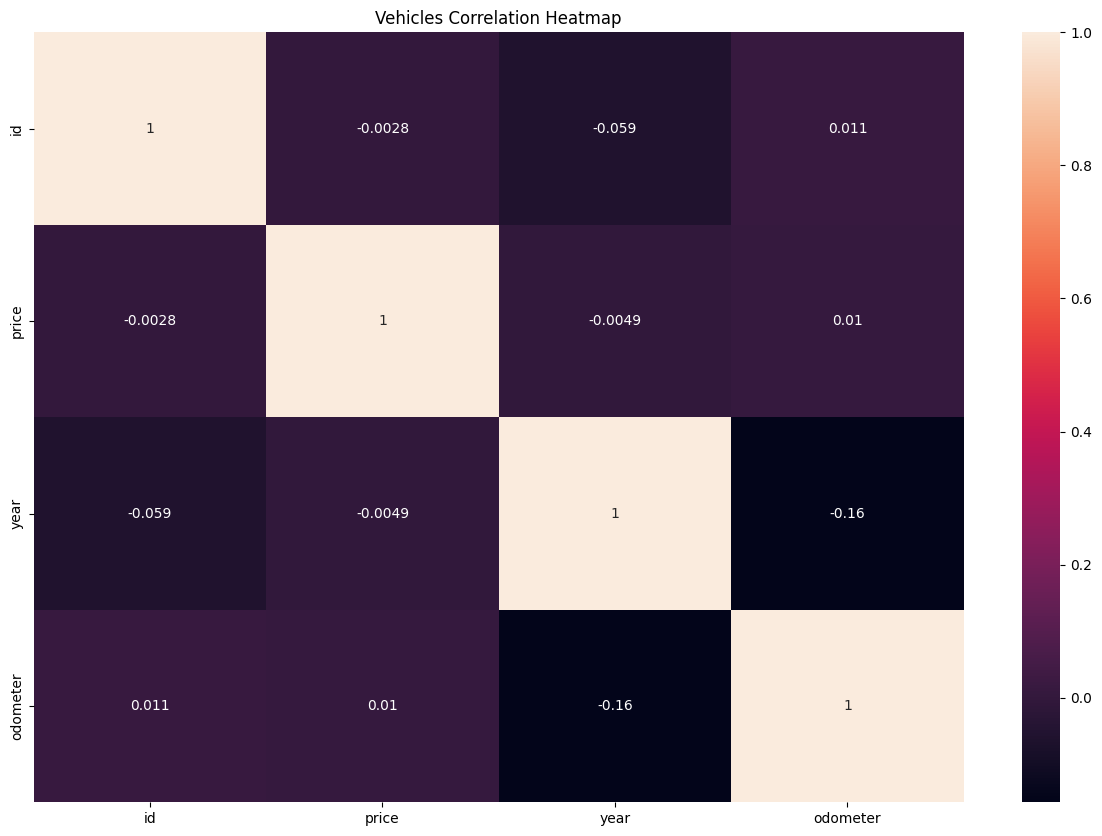

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(vehicles.corr(numeric_only=True), annot=True)
ax.set_title('Vehicles Correlation Heatmap')
plt.show()

**Observation** : From the above Vehicle correlation matrix and the heat map, it is clear that the 'id' attribure does have any relationship with other attributes, and an ideal attribute to delete and it seems odd that the correlation between year and odometer is negtiave, but in real life the older the car and those many miles.

### Time for some Plots

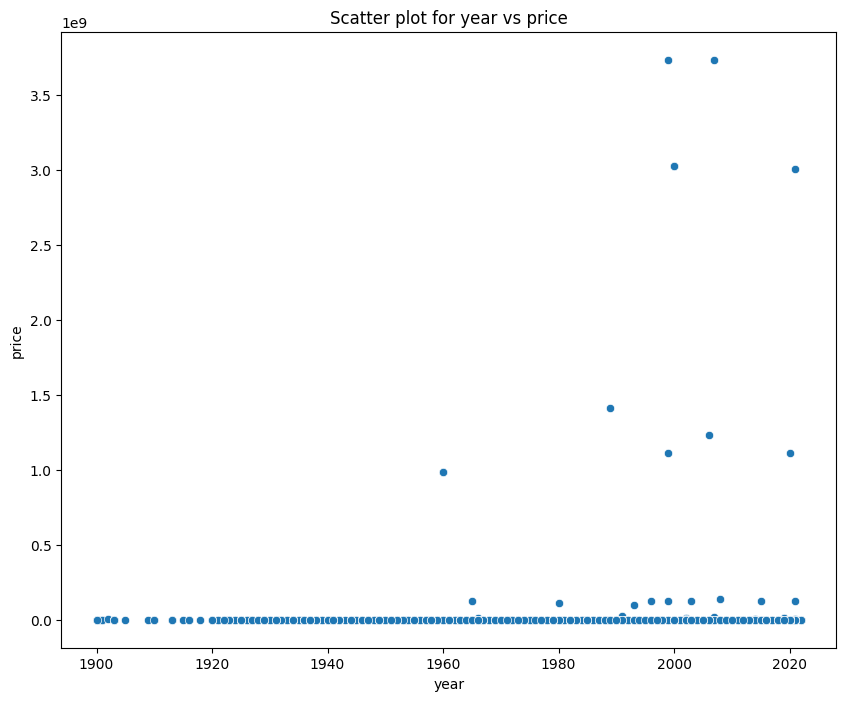

In [10]:
# draw a plot between price and year

def drawscatterplot(data,x,y):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.scatterplot(data=data, x=x, y=y)
  fig.set_title('Scatter plot for ' + str(x) +' vs ' + str(y))
  fig.set_xlabel(str(x))
  fig.set_ylabel(str(y))
  plt.show()

drawscatterplot(vehicles,'year','price')

In [11]:
def drawhistplot(data,x,palette):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.histplot(data=data, x=x, palette=palette)
  fig.set_title('Histogram for ' + str(x))

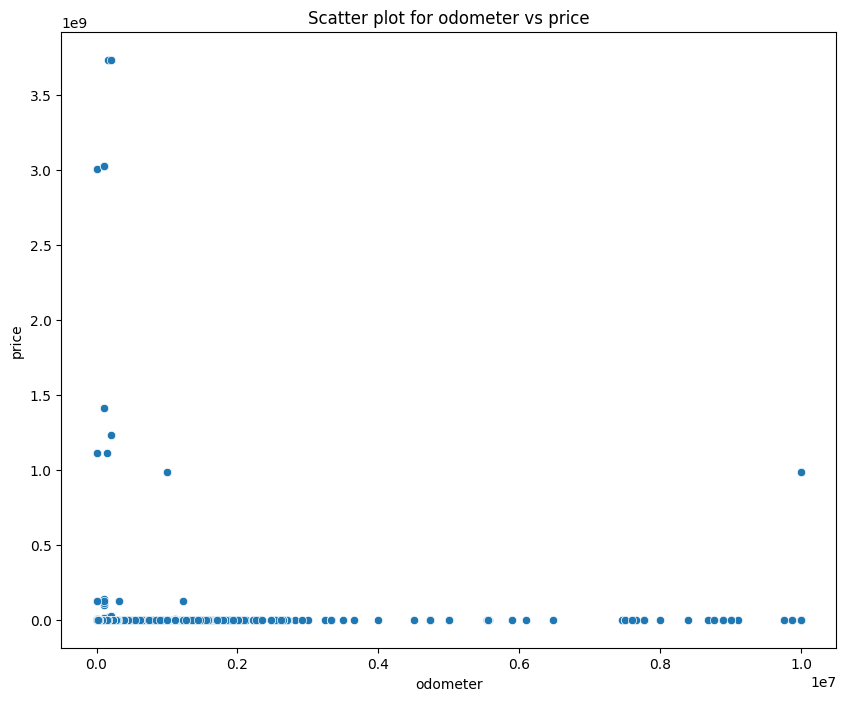

In [12]:
# draw a plot between price and year
drawscatterplot(vehicles,'odometer','price')

**Observations**: From the above two plots, most of the prices are 0.0 , this could be an issue with NaN values in the price attribute, we will clear this in the data preparation section to re-draw these plots

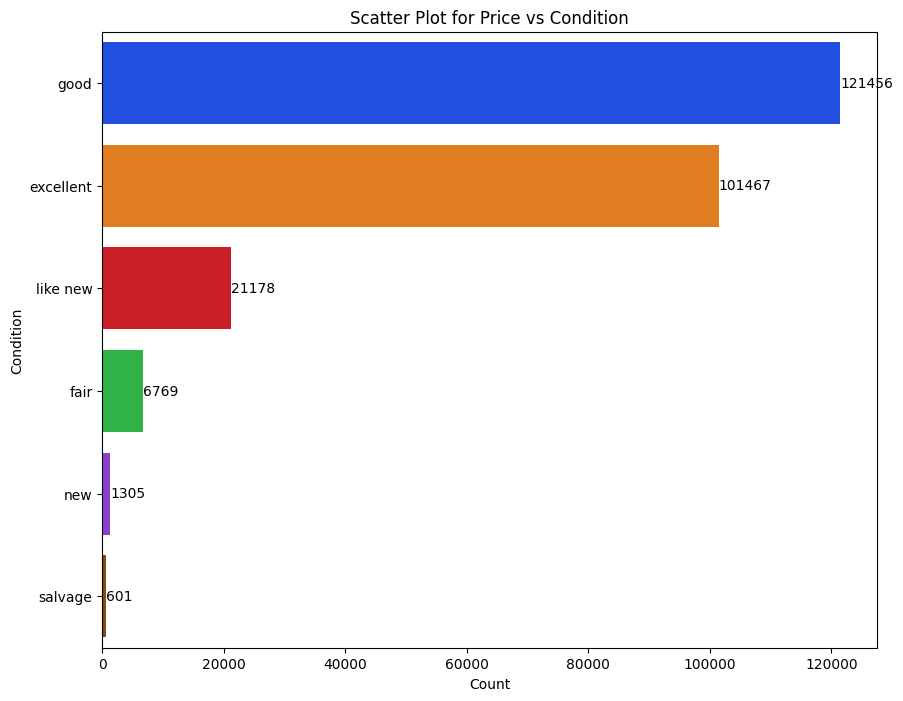

In [13]:
# draw a plot between condition and year
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.countplot(data=vehicles, y='condition', order=vehicles['condition'].value_counts().index, palette='bright', hue='condition',legend=False)
fig.set_title('Scatter Plot for Price vs Condition')
fig.set_xlabel('Count')
fig.set_ylabel('Condition')
for container in fig.containers:
    fig.bar_label(container)
plt.show()

**Observation**: The provided data has more cars with good condition

<Axes: title={'center': 'Bar Plot for Price vs Condition'}, xlabel='condition', ylabel='price'>

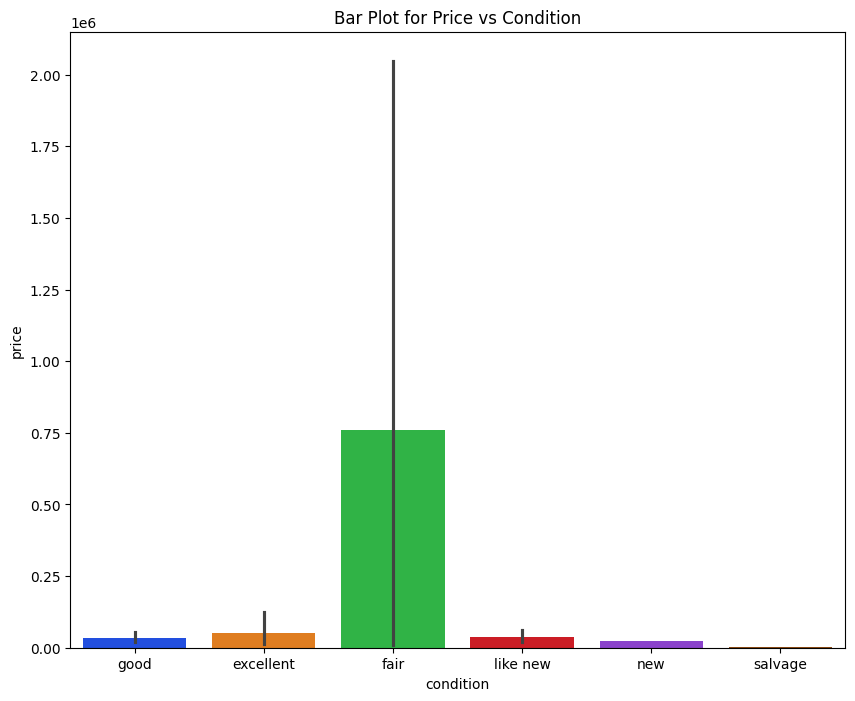

In [14]:
# generate bar plot between condition, price
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.barplot(data=vehicles, x='condition', y='price', palette='bright', hue='condition',legend=False)
fig.set_title('Bar Plot for Price vs Condition')
fig

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [15]:
# drop unique id & VIN columns
vehicles.drop(columns=['id','VIN'], inplace=True)

# get integer and category columns
cat_cols = vehicles.select_dtypes(include=['object']).columns
num_cols = vehicles.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# check how many null values exists in integer columns before imputing
vehicles.isnull().sum()[num_cols]

,0
price,0
year,1205
odometer,4400


In [17]:
# use interative imputer with KNN to replace empty / nAN values in integer columns
vehciles_num = vehicles[num_cols]
imputer_num = IterativeImputer(KNeighborsRegressor(n_neighbors=15))
impute_data = imputer_num.fit_transform(vehciles_num)
vehicles[num_cols] = impute_data

In [18]:
# check how many null values exists in integer after before imputing
vehicles.isnull().sum()[num_cols]

,0
price,0
year,0
odometer,0


In [19]:
# check how many null values exists in category columns before imputing
vehicles.isnull().sum()[cat_cols]

,0
region,0
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
title_status,8242
transmission,2556
drive,130567
size,306361


In [20]:
# use Simple imputer with  replace empty / nAN values in category columns
vehicles_cat = vehicles[cat_cols]
imputer_cat = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
impute_data = imputer_cat.fit_transform(vehicles_cat)
vehicles[cat_cols] = impute_data

In [21]:
# check how many null values exists in category columns after imputing
vehicles.isnull().sum()[cat_cols]

,0
region,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
title_status,0
transmission,0
drive,0
size,0


In [22]:
vehicles.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
8268,kenai peninsula,5500.00,2004.00,chevrolet,silverado 1500,good,6 cylinders,gas,156000.00,clean,automatic,4wd,full-size,sedan,white,ak
347347,greenville / upstate,12980.00,2008.00,lexus,rx 350,good,6 cylinders,gas,103176.00,clean,automatic,fwd,full-size,SUV,black,sc
2396,gadsden-anniston,22500.00,1936.00,ford,Nash,good,6 cylinders,gas,1.00,clean,automatic,4wd,full-size,sedan,white,al
397809,richmond,10000.00,2007.00,lexus,rx 350,good,6 cylinders,gas,135147.00,clean,automatic,fwd,full-size,SUV,blue,va
379077,mcallen / edinburg,11990.00,2014.00,chevrolet,silverado 1500,good,6 cylinders,gas,171750.00,clean,automatic,rwd,full-size,pickup,white,tx


In [23]:
# keep only those records with price & odometer values greater than 0
clean_vehicles = vehicles[(vehicles['price'] > 0) & (vehicles['odometer'] > 0)]
clean_vehicles.head()
print("Data Size: : " + str(clean_vehicles.shape))

Data Size: : (392871, 16)


In [24]:
#delete any duplicates
clean_vehicles.drop_duplicates()
clean_vehicles = clean_vehicles.sample(20000)
clean_vehicles.reset_index(drop=True, inplace=True)
clean_vehicles.shape

(20000, 16)

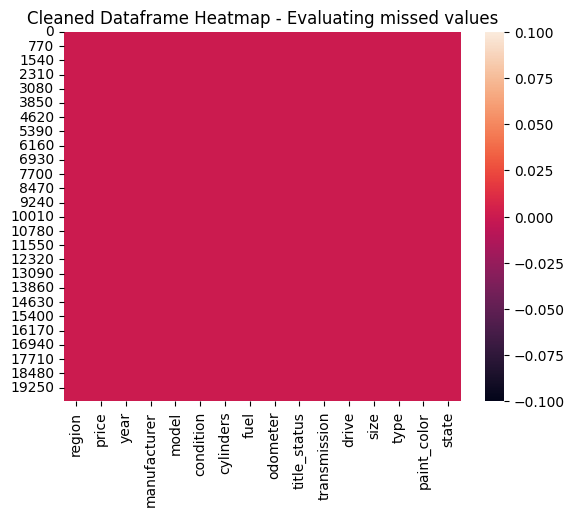

In [25]:
#making sure there are no null or empty values
ax = sns.heatmap(
	clean_vehicles.isnull()
)
ax.set_title("Cleaned Dataframe Heatmap - Evaluating missed values")
plt.show()

In [26]:
missing_data = missing_df(clean_vehicles)
missing_data[missing_data['count']>0]

,count,percentage


In [ ]:
#drawhistplot(clean_vehicles,'price','viridis')

#fig, ax = plt.subplots(1,2,figsize=(15,10))
#fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
#fig.set_title('Histogram for Price')
#fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
#fig.set_title('Histogram Plot for Odometer')
#fig


### Identify Outliers

In this section we will try to indetify outliers from price, odometer, year columns and modify the data

we will use 1.5*IQR to find any value above 3rd quartile or below first quartile and remove them

We will deleting outliers for Price, Odomter, and Year attributes

In [ ]:
def remove_outliers(df, column):
    factor =1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
#before & after deleting outliers for price
fig, ax= plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['price'], ax= ax[0]).set(title='Distribution of Price before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'price')
fig = sns.histplot(clean_vehicles['price'], ax=ax[1]).set(title='Distribution of Price after outliers')
plt.show()

In [ ]:
#before & after deleting outliers for odomater
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['odometer'], ax =ax[0]).set(title='Distribution of odometer before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'odometer')
fig = sns.histplot(clean_vehicles['odometer'],ax=ax[1]).set(title='Distribution of odometer After Outliers')
plt.show()

In [ ]:
#before & after deleting outliers for year
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['year'], ax=ax[0]).set(title='Distribution of Years before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'year')
fig = sns.histplot(clean_vehicles['year'], ax= ax[1]).set(title='Distribution of years After Outliers')

In [ ]:
# draw histograms of price, odometer & year with hue as condition
fig, ax = plt.subplots(1,3,figsize=(15,10))
fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
fig.set_title('Histogram for Price')
fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
fig.set_title('Histogram Plot for Odometer')
fig = sns.histplot(data=clean_vehicles, x='year', palette='bright', hue='condition',ax=ax[2])
fig.set_title('Histogram Plot for year')
fig

In [ ]:
# comnapring scatter plots for year & odometer with prices after deleting outliers
drawscatterplot(clean_vehicles,'year','price')
drawscatterplot(clean_vehicles,'odometer','price')

### Convert Categorical values into inter values

In [ ]:
#draw pariplot among set of fields

def sample_data(df,cols,no_of_samples,random_state):
    return df[cols].sample(n=no_of_samples, random_state=random_state)

def drawpairplot(df,hue,palette):
  sns.pairplot(df, hue=hue, palette=palette)

drawpairplot(sample_data(clean_vehicles,['price', 'year','odometer','type'],1000,1),'type','bright')

**Observations**:


1.   There is a possitive corrleation between price and year
2.   There is a negetive correlation between price and odometer



In [ ]:
le = LabelEncoder()
le_encorers = {}
clean_vehicles_encoded = clean_vehicles.copy()
for col in cat_cols:
    encoded_values = le.fit_transform(clean_vehicles_encoded[col])
    le_name_mapping = dict(zip(encoded_values, clean_vehicles_encoded[col]))
    clean_vehicles_encoded[col] = encoded_values
    le_encorers[col] = le_name_mapping
    print('Feature', col)
    print('mapping', le_name_mapping)

In [ ]:
clean_vehicles_encoded.head()

In [ ]:
le_encorers['type']

In [ ]:
drawpairplot(sample_data(clean_vehicles_encoded,['price', 'manufacturer','condition','cylinders','transmission','type'],1000,1),'type','bright')

In [ ]:
#Create a correlation Heatmap with all columns
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(clean_vehicles_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

**Observations**:


1.   As expected price and Year has positive correlation
2.   Price and number of cylinders has postive correlation
3.   Surprisngly paint color also has positive correlation with price, type and drive types
4.   year has negative correlation with odometer and surprisngly with fule type
5.   Cylinders and fuel has negative correlation

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

I will split my data into train and development data sets and will use Linear Regression, Ridge and Lasso models to define best model

In [ ]:
# split data into train and development data
X = clean_vehicles_encoded.drop(columns=['price'])
y = clean_vehicles_encoded['price']

In [ ]:
# use train and test split method to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


###LInear Regression

In [ ]:
# collect all model results in a list for final comparision
results = []

# define a simple Linear Regression model and find MSE, MAE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
train_predicts_ln = pipeline.predict(X_train)
test_predicts_ln = pipeline.predict(X_test)

train_mse_ln = mean_squared_error(y_train, train_predicts_ln)
test_mse_ln = mean_squared_error(y_test, test_predicts_ln)
train_mae_ln = mean_absolute_error(y_train, train_predicts_ln)
test_mae_ln = mean_absolute_error(y_test, test_predicts_ln)

print(f"Linear Model: train_mse={train_mse_ln}, test_mse={test_mse_ln}")
print(f"Linear Model: train_mae={train_mae_ln}, test_mae={test_mae_ln}")
print(f"Model Accuracy: {round(pipeline.score(X_test, y_test)*100,2)}")
print(f"Model Coefficients: {pipeline.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline.named_steps['model'].intercept_}")

simple_linear_results = {
    'model': 'Linear Regression',
    'train_mse': train_mse_ln,
    'test_mse': test_mse_ln,
    'train_mae': train_mae_ln,
    'test_mae': test_mae_ln,
    'accuracy': round(pipeline.score(X_test, y_test)*100,2),
    'coefficients': pipeline.named_steps['model'].coef_,
    'intercept': pipeline.named_steps['model'].intercept_
}
results.append(simple_linear_results)

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_ln, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_ln, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression Results - odometer against Price')
plt.show()

###LInear Regression with Polynomial Degrees

In [ ]:
# define a  Linear Regression model with Polynomial degree 2 and find MSE, MAE
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
pipeline_poly.fit(X_train, y_train)
train_predicts_poly= pipeline_poly.predict(X_train)
test_predicts_poly = pipeline_poly.predict(X_test)

train_mse_poly = mean_squared_error(y_train, train_predicts_poly)
test_mse_poly = mean_squared_error(y_test, test_predicts_poly)
train_mae_poly= mean_absolute_error(y_train, train_predicts_poly)
test_mae_poly = mean_absolute_error(y_test, test_predicts_poly)

print(f"Linear Model: train_mse={train_mse_poly}, test_mse={test_mse_poly}")
print(f"Linear Model: train_mae={train_mae_poly}, test_mae={test_mae_poly}")
print(f"Model Accuracy: {round(pipeline_poly.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {pipeline_poly.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline_poly.named_steps['model'].intercept_}")

poly_linear_results = {
    'model': 'Poly Degree 2 Linear Regression',
    'train_mse': train_mse_poly,
    'test_mse': test_mse_poly,
    'train_mae': train_mae_poly,
    'test_mae': test_mae_poly,
    'accuracy': round(pipeline_poly.score(X_test, y_test)*100,2),
    'coefficients': pipeline_poly.named_steps['model'].coef_,
    'intercept': pipeline_poly.named_steps['model'].intercept_
}

results.append(poly_linear_results)

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_poly, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Poly degree 2 Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_poly, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Poly degree 2 Results - odometer against Price')
plt.show()

###Linear Regression with Grid Search

In [ ]:
# create a pipeline with linear regression but do not include degree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# define degree parameters to assign to Grid search
param_grid ={
    'poly__degree':[1,2,3]
}

grid_linear = GridSearchCV(pipeline, param_grid, cv=5)
grid_linear.fit(X_train, y_train)


In [ ]:
#what is the best estimator and degree
best_params_linear = grid_linear.best_params_
best_model_linear = grid_linear.best_estimator_

print(f"Best Parameters: {best_params_linear}")
print(f"Best Model: {best_model_linear}")

In [ ]:
# from the best model, calculare MSE & MAE
pred_train_grid = best_model_linear.predict(X_train)
pred_test_grid = best_model_linear.predict(X_test)

train_mse_grid = mean_squared_error(y_train, pred_train_grid)
test_mse_grid = mean_squared_error(y_test, pred_test_grid)
train_mae_grid = mean_absolute_error(y_train, pred_train_grid)
test_mae_grid = mean_absolute_error(y_test, pred_test_grid)

print(f"Grid Search Linear Model: train_mse={train_mse_grid}, test_mse={test_mse_grid}")
print(f"Grid Search Linear Model: train_mae={train_mae_grid}, test_mae={test_mae_grid}")
print(f"Model Accuracy: {round(best_model_linear.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_linear.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_linear.named_steps['model'].intercept_}")

grid_linear_results={
    'model': 'Grid Search Linear Regression',
    'train_mse': train_mse_grid,
    'test_mse': test_mse_grid,
    'train_mae': train_mae_grid,
    'test_mae': test_mae_grid,
    'accuracy': round(best_model_linear.score(X_test, y_test)*100,2),
    'coefficients': best_model_linear.named_steps['model'].coef_,
    'intercept': best_model_linear.named_steps['model'].intercept_
}
results.append(grid_linear_results)

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=pred_test_grid, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Linear Grid Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=pred_test_grid, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Linear Grid Results - odometer against Price')
plt.show()

### Ridge Regression with Grid Search

In [ ]:
# create pipeline with ridge regressoion
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge())
])

param_grid={
    'poly__degree':[1,2,3],
    'model__alpha':[0.1,1,10]
}

grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)


In [ ]:
# find the best alpha and degree
best_model_ridge = grid_ridge.best_estimator_
best_params_ridge = grid_ridge.best_params_

print(f"Best Parameters: {best_params_ridge}")
print(f"Best Model: {best_model_ridge}")

In [ ]:
preds_train_ridge = best_model_ridge.predict(X_train)
preds_test_ridge = best_model_ridge.predict(X_test)

train_mse_ridge = mean_squared_error(y_train, preds_train_ridge)
test_mse_ridge = mean_squared_error(y_test, preds_test_ridge)
train_mae_ridge = mean_absolute_error(y_train, preds_train_ridge)
test_mae_ridge = mean_absolute_error(y_test, preds_test_ridge)

print(f"Grid Search Ridge Model: train_mse={train_mse_ridge}, test_mse={test_mse_ridge}")
print(f"Grid Search Ridge Model: train_mae={train_mae_ridge}, test_mae={test_mae_ridge}")
print(f"Model Accuracy: {round(best_model_ridge.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_ridge.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_ridge.named_steps['model'].intercept_}")

grid_ridge_results={
    'model': 'Grid Search Ridge Regression',
    'train_mse': train_mse_ridge,
    'test_mse': test_mse_ridge,
    'train_mae': train_mae_ridge,
    'test_mae': test_mae_ridge,
    'accuracy': round(best_model_ridge.score(X_test, y_test)*100,2),
    'coefficients': best_model_ridge.named_steps['model'].coef_,
    'intercept': best_model_ridge.named_steps['model'].intercept_
}
results.append(grid_ridge_results)


In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=preds_test_ridge, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Ridge Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=preds_test_ridge, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Ridge Results - odometer against Price')
plt.show()

### Lasso Regression with Grid Search

In [ ]:
# create lasso pipeline using GridSearch

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Lasso(random_state = 42))
])

param_grid={
    'poly__degree':[1,2,3]
}

grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

In [ ]:
#best model
best_model_lasso = grid_lasso.best_estimator_
best_params_lasso = grid_lasso.best_params_

print(f"Best Parameters: {best_params_lasso}")
print(f"Best Model: {best_model_lasso}")

In [ ]:
train_preds_lasso = best_model_lasso.predict(X_train)
test_preds_lasso = best_model_lasso.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)
train_mae_lasso = mean_absolute_error(y_train, train_preds_lasso)
test_mae_lasso = mean_absolute_error(y_test, test_preds_lasso)

print(f"Grid Search Lasso Model: train_mse={train_mse_lasso}, test_mse={test_mse_lasso}")
print(f"Grid Search Lasso Model: train_mae={train_mae_lasso}, test_mae={test_mae_lasso}")
print(f"Model Accuracy: {round(best_model_lasso.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_lasso.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_lasso.named_steps['model'].intercept_}")

grid_lasso={
    'model': 'Grid Search Lasso Regression',
    'train_mse': train_mse_lasso,
    'test_mse': test_mse_lasso,
    'train_mae': train_mae_lasso,
    'test_mae': test_mae_lasso,
    'accuracy': round(best_model_lasso.score(X_test, y_test)*100,2),
    'coefficients': best_model_lasso.named_steps['model'].coef_,
    'intercept': best_model_lasso.named_steps['model'].intercept_
}
results.append(grid_lasso)


In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_preds_lasso, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Lasso Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_preds_lasso, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Lasso Results - odometer against Price')
plt.show()

### Sequential Feature selection



In [ ]:
#Create a pipline with sequential feature selection

from sklearn.feature_selection import SequentialFeatureSelector

seq_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')),
    ('model', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_seq = GridSearchCV(seq_pipeline, param_grid, cv=5)
grid_seq.fit(X_train, y_train)

In [ ]:
best_model_seq = grid_seq.best_estimator_
best_params_seq = grid_seq.best_params_

print(f"Best Parameters: {best_params_seq}")
print(f"Best Model: {best_model_seq}")

In [ ]:
train_preds_seq = best_model_seq.predict(X_train)
test_preds_seq = best_model_seq.predict(X_test)

train_mse_seq = mean_squared_error(y_train, train_preds_seq)
test_mse_seq = mean_squared_error(y_test, test_preds_seq)
train_mae_seq= mean_absolute_error(y_train, train_preds_seq)
test_mae_seq = mean_absolute_error(y_test, test_preds_seq)

print(f"Grid Search Lasso Model: train_mse={train_mse_seq}, test_mse={test_mse_seq}")
print(f"Grid Search Lasso Model: train_mae={train_mae_seq}, test_mae={test_mae_seq}")
print(f"Model Accuracy: {round(best_model_seq.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_seq.named_steps['model'].intercept_}")

grid_seq ={
    'model': 'Grid Search Sequential Feature Selection',
    'train_mse': train_mse_seq,
    'test_mse': test_mse_seq,
    'train_mae': train_mae_seq,
    'test_mae': test_mae_seq,
    'accuracy': round(best_model_seq.score(X_test, y_test)*100,2),
    'coefficients': best_model_seq.named_steps['model'].coef_,
    'intercept': best_model_seq.named_steps['model'].intercept_
}
results.append(grid_seq)

### K-Fold Feature selection

In [ ]:
from sklearn.model_selection import KFold

# create a linear regression pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

In [ ]:
# best degree for KFOLD
best_model_kfold = grid_search.best_estimator_
best_params_kfold = grid_search.best_params_

print(f"Best Parameters: {best_params_kfold}")
print(f"Best Model: {best_model_kfold}")

In [ ]:
train_preds_kf = best_model_kfold.predict(X_train)
test_preds_kf = best_model_kfold.predict(X_test)

  # Calculate evaluation metrics
train_mse_kf = mean_squared_error(y_train, train_preds_kf)
test_mse_kf = mean_squared_error(y_test, test_preds_kf)
train_mae_kf= mean_absolute_error(y_train, train_preds_kf)
test_mae_kf = mean_absolute_error(y_test, test_preds_kf)

print(f"Grid Search Lasso Model: train_mse={train_mse_kf}, test_mse={test_mse_kf}")
print(f"Grid Search Lasso Model: train_mae={train_mae_kf}, test_mae={test_mae_kf}")
print(f"Model Accuracy: {round(best_model_kfold.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_kfold.named_steps['linear_regression'].intercept_}")

grid_kfold={
    'model': 'Grid Search K-Fold Feature Selection',
    'train_mse': train_mse_kf,
    'test_mse': test_mse_kf,
    'train_mae': train_mae_kf,
    'test_mae': test_mae_kf,
    'accuracy': round(best_model_kfold.score(X_test, y_test)*100,2),
    'coefficients': best_model_kfold.named_steps['linear_regression'].coef_,
    'intercept': best_model_kfold.named_steps['linear_regression'].intercept_
}
results.append(grid_kfold)

### K Neighbors Regression with K=5

In [ ]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

param_grid={
    'poly__degree':[1,2,3]
}

grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

# best degree for KFOLD
best_model_knn = grid_knn.best_estimator_
best_params_knn = grid_knn.best_params_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Model: {best_model_knn}")

train_preds_knn = best_model_knn.predict(X_train)
test_preds_knn = best_model_knn.predict(X_test)

  # Calculate evaluation metrics
train_mse_knn = mean_squared_error(y_train, train_preds_knn)
test_mse_knn = mean_squared_error(y_test, test_preds_knn)
train_mae_knn= mean_absolute_error(y_train, train_preds_knn)
test_mae_knn = mean_absolute_error(y_test, test_preds_knn)

print(f"Grid Search Lasso Model: train_mse={train_mse_knn}, test_mse={test_mse_knn}")
print(f"Grid Search Lasso Model: train_mae={train_mae_knn}, test_mae={test_mae_knn}")
print(f"Model Accuracy: {round(best_model_knn.score(X_test, y_test)*100,2)}")


grid_knn={
    'model': 'Grid Search KNN',
    'train_mse': train_mse_knn,
    'test_mse': test_mse_knn,
    'train_mae': train_mae_knn,
    'test_mae': test_mae_knn,
    'accuracy': round(best_model_knn.score(X_test, y_test)*100,2),
    'coefficients': 0,
    'intercept': 0
}

results.append(grid_knn)

**Observation** : All the models performed better with minor differences, the scatter plots show similar distrubution when compared to actual and model predictions.

In [ ]:
#create data frame with all the model results

model_results = pd.DataFrame(results)
model_results.sort_values(by='accuracy', ascending=False).drop_duplicates(subset=['model'])

In [ ]:
#draw bar plot between model and accuracy
model_results = model_results.sort_values(by='accuracy', ascending=False).drop_duplicates(subset=['model'])
plt.figure(figsize=(10,6))
ax = sns.barplot(x='model', y='accuracy', data=model_results, palette='dark', hue='accuracy')
# Annotate the bars with the values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.set_style("whitegrid")
plt.title('Model Accuracy Comparison')
plt.xticks(fontsize=10)
plt.xticks(rotation = (90))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

It took lot of time to execute all the models with different degree and alpha values, i limited myself to degree upto 3 for Grid Search due to heavy computational time, In most of the cases , i got best degree is 3 and alpha 10.
From the data frame I created (I followed the apprach by a github user 'jaruizsys'), i compared the MSE and MAE values and picked one better model

In [ ]:
df_results = model_results[['model','train_mse','test_mse']].sort_values(by='test_mse', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')


In [ ]:
df_results = model_results[['model','train_mae','test_mae']].sort_values(by='test_mae', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

Observation: From the above two diagrams and from the data frame it is obvious that the lasso regression has less MSE and MAE value

In [ ]:
# create Permutation importance for lasso model
from sklearn.inspection import permutation_importance
permu = permutation_importance(best_model_lasso, X_test, y_test,n_repeats=30,random_state=0)
importance_df = pd.DataFrame(permu.importances_mean, index=X_test.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [ ]:
#draw plot of importance using sns
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x=importance_df.index, y=importance_df.Importance, ax=ax, palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Permutation Importance')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
clean_vehicles_encoded.head()

In [ ]:
le_encorers['cylinders']

In [ ]:
# draw plots
fig, ax = plt.subplots(2,3, figsize=(20,10))
# sales by cylinders
vehicle_cylinders_price = clean_vehicles.groupby('cylinders')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_cylinders_price.index, y=vehicle_cylinders_price, ax=ax[0][0], hue=vehicle_cylinders_price.index, legend=True, palette='bright')
# Customize the legend
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['cylinders'][int(label)] for label in labels], title='cylinders', loc='upper right')
fig.set_title('Sales by Cylinders')
# sales by fuel
vehicle_fuel_price = clean_vehicles.groupby('fuel')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_fuel_price.index, y=vehicle_fuel_price, ax=ax[0][1], hue=vehicle_fuel_price.index, legend=True, palette='bright')
# Customize the legend
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['fuel'][int(label)] for label in labels], title='fuel', loc='upper right')
fig.set_title('Sales by fuel')
fig.legend(loc='upper right' ,labels = le_encorers['fuel'])
vehicle_drive_price = clean_vehicles.groupby('drive')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_drive_price.index, y=vehicle_drive_price, ax=ax[0][2], hue=vehicle_drive_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['drive'][int(label)] for label in labels], title='drive', loc='upper right')
fig.set_title('Sales by Drive')
vehicle_transmission_price = clean_vehicles.groupby('transmission')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_transmission_price.index, y=vehicle_transmission_price, ax=ax[1][0], hue=vehicle_transmission_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['transmission'][int(label)] for label in labels], title='transmission', loc='upper right')
fig.set_title('Sales by Tranmission')
vehicle_condition_price = clean_vehicles.groupby('condition')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_condition_price.index, y=vehicle_condition_price, ax=ax[1][1], hue=vehicle_condition_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['condition'][int(label)] for label in labels], title='condition', loc='upper right')
fig.set_title('Sales by Condition')
vehicle_year_price = clean_vehicles.groupby('year')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_year_price.index, y=vehicle_year_price, ax=ax[1][2], hue=vehicle_year_price.index, legend=True, palette='bright')
fig.set_title('Sales by Year')
plt.show()